In [ ]:
import pandas as pd
import nltk
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import os
import joblib

In [ ]:
df = pd.read_csv('/content/imdb-dataset.csv', engine='python')


In [ ]:
df = df.sample(n=5000, random_state=42)

In [ ]:
df.head()

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df.duplicated().sum()

np.int64(7)

In [ ]:
df.describe()

,review,sentiment
count,5000,5000
unique,4993,2
top,"in this movie, joe pesci slams dunks a basketb...",positive
freq,2,2519


In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

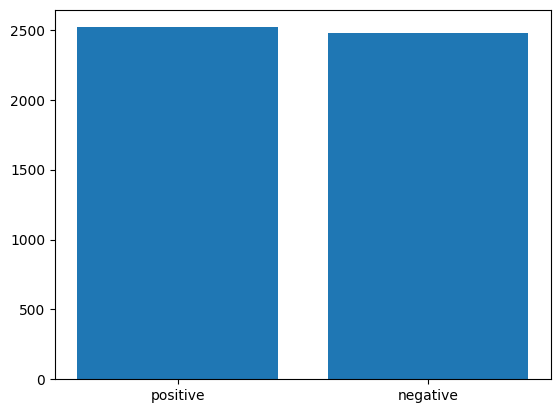

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(df['sentiment'].value_counts().index, df['sentiment'].value_counts())
plt.show()


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
review_columns = df.columns[:-1]
sentiment_column = df.columns[-1]
df['review'] = df[review_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
df['sentiment'] = df[sentiment_column].map({'positive': 1, 'negative': 0})
df = df[['review', 'sentiment']]
df['review'] = df['review'].apply(preprocess_text)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['review']).toarray()
y = df['sentiment'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

✅ Model Accuracy: 85.10%


In [ ]:
precision = precision_score(y_test, model.predict(X_test))
print(f"✅ Model Precision: {precision * 100:.2f}%")

✅ Model Precision: 81.89%


In [ ]:
recall = recall_score(y_test, model.predict(X_test))
print(f"✅ Model Recall: {recall * 100:.2f}%")

✅ Model Recall: 89.68%


In [ ]:
f1_score = f1_score(y_test, model.predict(X_test))
print(f"✅ Model F1 Score: {f1_score * 100:.2f}%")

✅ Model F1 Score: 85.60%


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       506
           1       0.82      0.90      0.86       494

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



In [ ]:
BASE_DIR = '/content'
MODELS_DIR = os.path.join(BASE_DIR, 'models')

In [ ]:
os.makedirs(MODELS_DIR, exist_ok=True)

In [ ]:
joblib.dump(model, os.path.join(MODELS_DIR, 'sentiment_model.pkl'))
joblib.dump(tfidf, os.path.join(MODELS_DIR, 'tfidf_vectorizer.pkl'))